# Binning by SIC Division Code Ranges 

![SIC Division](SIC_Division1.png)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Using Target table with "Y" values beacuse we are dealing with categorical data 
df = pd.read_csv('Targets', index_col=0)
df.head(2)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.25,1,0


In [6]:
Agriculture = df[df.I3 < 999].count() 
print(Agriculture)
# 2 attributes fall within the Agriculture, Forestry and Fishing
# Division 

I1        2
I2        2
I3        2
P_IPO     2
P_H       2
P_L       2
P_1DAY    2
Y1        2
Y2        2
dtype: int64


In [7]:
Mining = df.loc[(df['I3'] >= 1000) & (df['I3'] <= 1499)].count()
print(Mining)
# 31 attributes fall within Mining 

I1        31
I2        31
I3        31
P_IPO     31
P_H       31
P_L       31
P_1DAY    31
Y1        31
Y2        31
dtype: int64


In [8]:
Construction = df.loc[(df['I3'] >= 1500) & (df['I3'] <= 1799)].count()
print(Construction)
# 2 attributes fall within Construction 

I1        2
I2        2
I3        2
P_IPO     2
P_H       2
P_L       2
P_1DAY    2
Y1        2
Y2        2
dtype: int64


In [9]:
NotUsed = df.loc[(df['I3'] >= 1800) & (df['I3'] <= 1999)].count()
print(NotUsed)
# This range of SIC code is not used
# Therefore, we want to see 0 attributes here 

I1        0
I2        0
I3        0
P_IPO     0
P_H       0
P_L       0
P_1DAY    0
Y1        0
Y2        0
dtype: int64


In [10]:
Manufacturing = df.loc[(df['I3'] >= 2000) & (df['I3'] <= 3999)].count()
print(Manufacturing)
# 308 attributes all within Manufacturing 
# This will become its own bin

I1        308
I2        308
I3        308
P_IPO     308
P_H       308
P_L       308
P_1DAY    308
Y1        308
Y2        308
dtype: int64


In [12]:
Transportation = df.loc[(df['I3'] >= 4000) & (df['I3'] <= 4999)].count()
print(Transportation)
# 60 Attributes fall within Transportation

I1        60
I2        60
I3        60
P_IPO     60
P_H       60
P_L       60
P_1DAY    60
Y1        60
Y2        60
dtype: int64


In [13]:
Wholesale = df.loc[(df['I3'] >= 5000) & (df['I3'] <= 5199)].count()
print(Wholesale)
# 14 Attributes fall within Wholesale Trade

I1        14
I2        14
I3        14
P_IPO     14
P_H       14
P_L       14
P_1DAY    14
Y1        14
Y2        14
dtype: int64


In [14]:
Retail = df.loc[(df['I3'] >= 5200) & (df['I3'] <= 5999)].count()
print(Retail)
# 50 Attributes fall within Retail Trade

I1        50
I2        50
I3        50
P_IPO     50
P_H       50
P_L       50
P_1DAY    50
Y1        50
Y2        50
dtype: int64


In [15]:
Finance = df.loc[(df['I3'] >= 6000) & (df['I3'] <= 6799)].count()
print(Finance)
# 6 Attributes fall within Finance, Insurance & Real Estate

I1        6
I2        6
I3        6
P_IPO     6
P_H       6
P_L       6
P_1DAY    6
Y1        6
Y2        6
dtype: int64


In [16]:
Services = df.loc[(df['I3'] >= 7000) & (df['I3'] <= 8999)].count()
print(Services)
# 209 Attributes fall within Services
# This will become its own bin 

I1        209
I2        209
I3        209
P_IPO     209
P_H       209
P_L       209
P_1DAY    209
Y1        209
Y2        209
dtype: int64


In [17]:
PublicAdmin = df.loc[(df['I3'] >= 9000) & (df['I3'] <= 9729)].count()
print(PublicAdmin)
# 0 Attributes fall within Public Admin

I1        0
I2        0
I3        0
P_IPO     0
P_H       0
P_L       0
P_1DAY    0
Y1        0
Y2        0
dtype: int64


In [18]:
Nonclass = df.loc[(df['I3'] >= 9900) & (df['I3'] <= 9999)].count()
print(Nonclass)
# 0 Attributes fall within Nonclassifiable

I1        0
I2        0
I3        0
P_IPO     0
P_H       0
P_L       0
P_1DAY    0
Y1        0
Y2        0
dtype: int64


Text(0.5, 1.0, 'Distribution of SIC Codes')

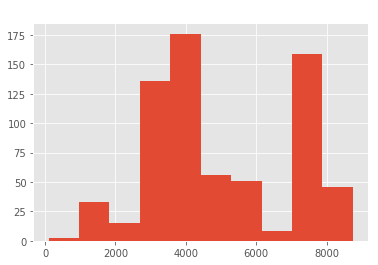

In [19]:
df['I3'].hist()
plt.title("Distribution of SIC Codes", color='white')
# Looking at the Distribution of the SIC Codes before Binning 

In [20]:
# Descriptive Statistics
df['I3'].describe()

count     682.000000
mean     4871.668622
std      2072.423003
min       100.000000
25%      3288.750000
50%      3990.000000
75%      7371.750000
max      8748.000000
Name: I3, dtype: float64

In [21]:
def binning(I3):
    if I3 < 2000:                
        return(1)
    # A bin for all small-scale divisons - "Other"
    if I3 >= 2000 and I3 <= 3999:        
        return(2)
    # A "Manufacturing" division bin
    if I3 >= 4000 and I3 <= 6999:      
        return(1)
    # The rest of the "Other" values 
    if I3 >= 7000:      
        return(3)
    # The third and final bin - "Services" division
df['I3_Bins'] = df['I3'].apply(binning)
df.head(15)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2,I3_Bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,0,1,2
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,1,0,2
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,1,0,2
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,1,1,2
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,0,1,1
5,ACOM,Ancestry.com Inc.,7379.0,13.5,14.5,12.5,14.200000,0,1,3
6,ACOR,ACORDA THERAPEUTICS INC,2836.0,6.0,13.0,11.0,6.720000,1,1,2
7,ACRX,ACELRX PHARMACEUTICALS INC,2834.0,5.0,14.0,12.0,4.550000,1,0,2
8,ACTV,ACTIVE NETWORK INC,7372.0,15.0,18.0,16.0,15.900000,1,1,3
9,ACW,ACCURIDE CORP,3714.0,9.0,19.0,17.0,0.000000,1,0,2


Text(0.5, 1.0, 'Distribution of SIC Codes - Binned')

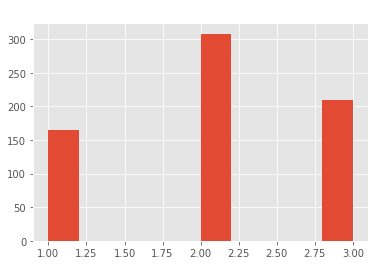

In [23]:
# Distribution of I3 post-Binning
df['I3_Bins'].hist()
plt.title("Distribution of SIC Codes - Binned", color='white')

In [24]:
# Exporting DataFrame as CSV 
df.to_csv('Binning', ',')